<a href="https://www.kaggle.com/code/ikomanggg28/classification-cardio-health-with-ml?scriptVersionId=183214411" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Classification Cardio Health

![](https://drsanjaykumar.co.in/wp-content/uploads/2022/06/Best-Cardiologist-in-Faridabad-Dr.-Sanjay-Kumar-explains-criteria-for-Cardiovascular-Health--2048x1461.jpg)

## Introduction

### Business Understanding

Cardiovascular disease (CVD) remains the leading cause of death worldwide, accounting for the majority of mortality and morbidity. The burden of heart disease not only affects patients and their families, but also puts a strain on healthcare systems. Early detection and accurate prediction of heart disease is critical to reducing this impact. Timely and accurate diagnosis can lead to early intervention, which significantly improves patient outcomes and reduces healthcare costs. Despite advances in medical technology and treatment, the challenge of accurately predicting heart disease risk remains. Traditional risk assessment methods, while useful, often fail to capture the complexity of individual patient profiles, leading to potential underdiagnosis or overdiagnosis. This underscores the need for more sophisticated tools that can analyze large and complex data sets to identify subtle patterns and correlations indicative of heart disease.

This study will utilize machine learning (ML) techniques to develop a robust classification model that predicts heart disease risk based on a comprehensive set of patient medical and demographic data. By integrating ML algorithms, we aim to improve prediction accuracy beyond traditional statistical methods. This model will support healthcare professionals in identifying high-risk individuals, facilitate timely interventions, and enable personalized treatment plans. The benefits of this approach are manifold. 
- Firstly, machine learning models can analyze complex datasets to uncover hidden patterns, leading to more accurate and earlier diagnoses of heart disease. 
- Secondly, by accurately predicting heart disease risk, healthcare providers can offer personalized treatment plans, improving patient care and outcomes. 
- Thirdly, early detection and intervention can prevent the progression of heart disease, reducing the need for expensive treatments and hospitalizations. 
- Finally, predictive models can help prioritize patients based on their risk levels, ensuring that medical resources are allocated more efficiently.

### Learning Objectives

The learning objectives that will be studied in the curriculum regarding customer churn analysis are as follows.
1. Identify the characteristics and behavior patterns of patients regarding Cardio Health.
2. Determine the factors that influence patients who have the potential to experience cardio disease.
3. Comparing the classification results of cardio health patients using machine learning models with the optimal model.
4. Solve the problem of patients who have the potential to experience cardio disease and make appropriate and effective strategies / recommendations.

### Data Understanding

The CardioHealth Risk Assessment Dataset includes detailed medical and demographic information from patients, such as age, cholesterol levels, blood pressure, and lifestyle factors. This dataset is designed for developing and testing machine learning models to predict the risk of heart disease. It provides a valuable resource for researchers and healthcare professionals aiming to improve diagnostic accuracy and patient outcomes in cardiovascular health. General Information about the total number of entries is 270 and the total number of columns is 14, with the column details explained as follows.
1. Age: Age of the patient
2. Sex: Gender of the patient (0 = Female, 1 = Male)
3. Chest pain type: Type of chest pain (values 1-4)
4. BP: Blood Pressure
5. Cholesterol: Cholesterol level
6. FBS over 120: Fasting blood sugar > 120 mg/dl (0 = False, 1 = True)
7. EKG results: Results of electrocardiographic test (values 0-2)
8. Max HR: Maximum heart rate achieved
9. Exercise angina: Exercise-induced angina (0 = No, 1 = Yes)
10. ST depression: ST depression induced by exercise relative to rest
11. Slope of ST: Slope of the peak exercise ST segment (values 1-3)
12. Number of vessels fluro: Number of major vessels colored by fluoroscopy (values 0-3)
13. Thallium: Thallium stress test result (values 3, 6, 7)
14. Heart Disease: Presence or absence of heart disease (Presence, Absence)

## Import Library & Dataset (Input)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/cardio-health-risk-assessment-dataset/Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,80,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,55,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,65,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,45,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [4]:
col_name = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']
df[col_name]=df[col_name].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    object 
 2   Chest pain type          270 non-null    object 
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    object 
 6   EKG results              270 non-null    object 
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    object 
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    object 
 11  Number of vessels fluro  270 non-null    object 
 12  Thallium                 270 non-null    object 
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(4), o

In [5]:
df.describe(include='all')

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.0,270.0,270.000000,270.000000,270.0,270.0,270.000000,270.0,270.00000,270.0,270.0,270.0,270
unique,NaN,2.0,4.0,NaN,NaN,2.0,3.0,NaN,2.0,NaN,3.0,4.0,3.0,2
top,NaN,1.0,4.0,NaN,NaN,0.0,2.0,NaN,0.0,NaN,1.0,0.0,3.0,Absence
freq,NaN,183.0,129.0,NaN,NaN,230.0,137.0,NaN,181.0,NaN,130.0,160.0,152.0,150
mean,54.077778,NaN,NaN,131.344444,249.659259,NaN,NaN,149.677778,NaN,1.05000,NaN,NaN,NaN,NaN
std,9.201052,NaN,NaN,17.861608,51.686237,NaN,NaN,23.165717,NaN,1.14521,NaN,NaN,NaN,NaN
min,29.000000,NaN,NaN,94.000000,126.000000,NaN,NaN,71.000000,NaN,0.00000,NaN,NaN,NaN,NaN
25%,47.000000,NaN,NaN,120.000000,213.000000,NaN,NaN,133.000000,NaN,0.00000,NaN,NaN,NaN,NaN
50%,54.000000,NaN,NaN,130.000000,245.000000,NaN,NaN,153.500000,NaN,0.80000,NaN,NaN,NaN,NaN
75%,60.750000,NaN,NaN,140.000000,280.000000,NaN,NaN,166.000000,NaN,1.60000,NaN,NaN,NaN,NaN


## Exploration Data Analysis

### Univariate Analysis

Text(0.5, 1.0, '% of Cardiovascular Patients')

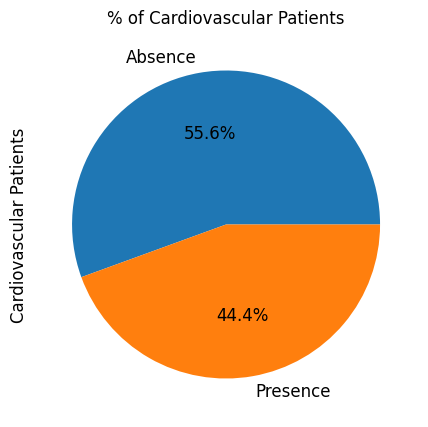

In [6]:
ax = (df['Heart Disease'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Absence', 'Presence'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Cardiovascular Patients',fontsize = 12)
ax.set_title('% of Cardiovascular Patients', fontsize = 12)

Based on the Pie charts analyzed, it is known that the majority of patients do not have cardiovascular disease. However, the percentage difference between patients who do not have heart disease (absence) and those who have heart disease (presence) is not too large, only around 10%. This suggests that although the number of patients without heart disease is higher, the number of patients with heart disease is also significant. Further analysis may be needed to understand the factors that influence this distribution, as well as its clinical implications in the context of cardiovascular disease prevention and treatment.

In [7]:
categorical_df = []
for col in df.columns:
    if df[col].nunique()<5:
        categorical_df.append(col)

print('categorical columns are {}'.format(categorical_df))

categorical columns are ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']


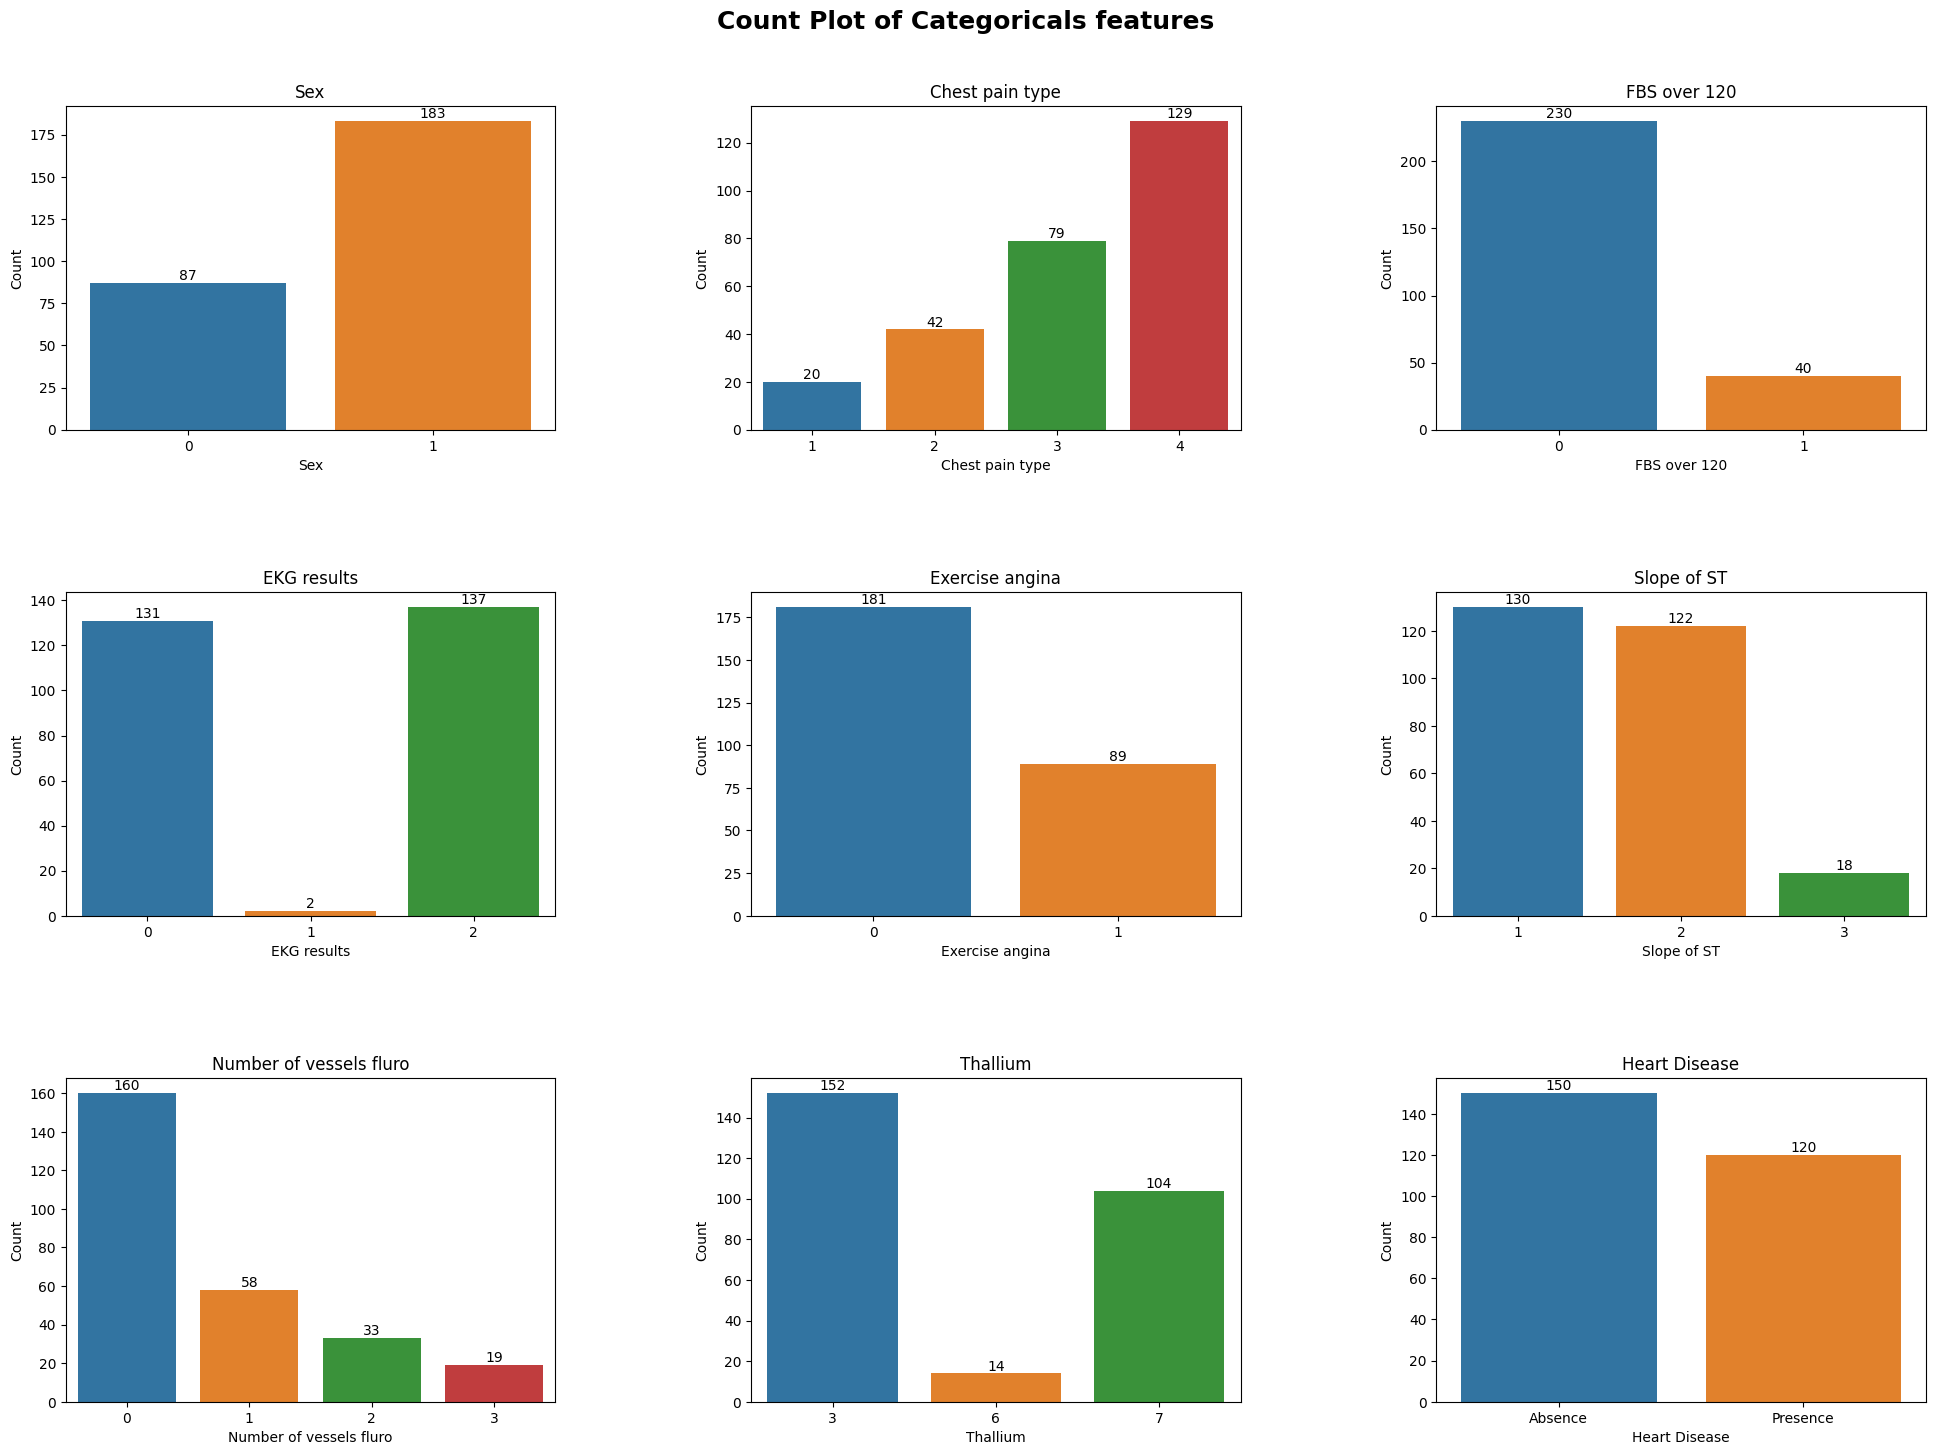

In [8]:
fig = plt.figure(figsize=[24,16])
fig.suptitle('Count Plot of Categoricals features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i , columns in enumerate(categorical_df):
    input = np.unique(df[columns] , return_counts = True)
    col= 'input'
    ax1 = fig.add_subplot(3, 3, i+1);
    ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')))
    ax1.set_title(f'{columns}')
    ax1.set_xlabel(f'{columns}')
    ax1.set_ylabel('Count')
    ax1.bar_label(ax1.containers[0])

Based on the barchart analysis of the categorical features, here are the key findings regarding patient characteristics:

1. Gender: The majority of patients suffering from heart disease are male. This suggests there is a higher propensity for men to develop this condition compared to women.

2. Heart Disease Type: The most common type of heart disease is type 4. This means that most patients show symptoms or test results that fit this category.

3. Fasting Blood Sugar: Most patients had fasting blood sugar levels below 120 mg/dL. This indicates that the majority of patients were not diabetic or had good blood sugar control.

4. Electrocardiogram (ECG) results: The majority of patients' ECG results showed type 0 and type 2. Type 0 may show normal ECG results, while type 2 may show certain less severe abnormalities.

5. Exercise Angina: Most patients do not experience exercise angina, which is chest pain that occurs during physical activity. This suggests that many patients do not experience angina symptoms triggered by physical activity.

6. Slope of ST Segment: The slope of ST segment on an ECG is often used to assess cardiac ischemia, and a value of 1 indicates certain characteristics of this ST segment.

7. Number of Vessels Fluro: Most patients have a score of 0 on the number of vessels fluro feature. This may indicate that many patients do not have significant narrowing or blockage of the coronary vessels that can be seen from fluoroscopy.

8. Thallium Scan: Most patients show thalium scan results at values of 3 and 7. Thalium scans are used to detect blood flow to the heart and the health of the heart muscle. These values may indicate a certain level of heart perfusion or heart muscle health assessed from this test.

Overall, this barchart analysis provides important insights into the demographic and clinical profile of patients with heart disease, which can be used for more effective treatment planning and prevention strategies.


In [9]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
print('numerical columns are {}'.format(numerical_df.columns))

numerical columns are Index(['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression'], dtype='object')


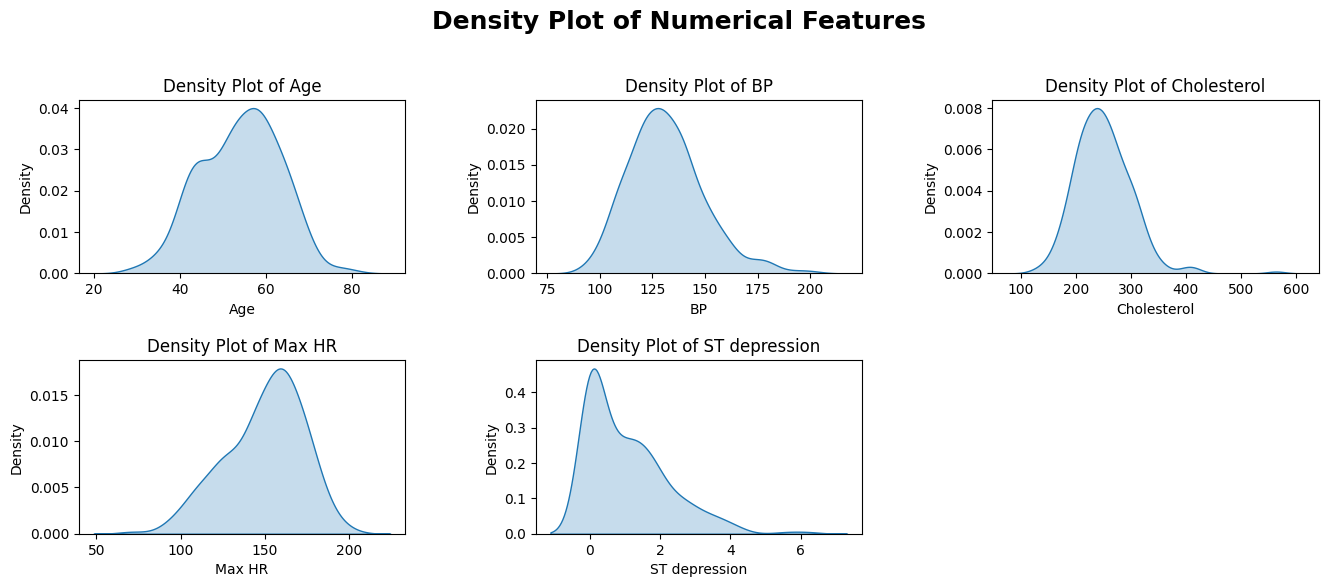

In [10]:
fig = plt.figure(figsize=(16, 15))
fig.suptitle('Density Plot of Numerical Features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

for i, column in enumerate(numerical_df.columns):
    ax = fig.add_subplot(5, 3, i + 1)
    sns.kdeplot(data=numerical_df, x=column, fill=True, ax=ax)
    ax.set_title(f'Density Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')

plt.show()

The criteria for cardiovascular patients based on numerical data analysis are as follows:

1. Age: Most patients were in the age range of 60 years, indicating that cardiovascular disease is more common in this age group.
2. Blood Pressure (BP): The mean systolic blood pressure (BP) value of the patients was around 125 mmHg, which falls under the category of prehypertension or mild hypertension.
3. Cholesterol Levels: Most patients had total cholesterol levels ranging from 200-300 mg/dL. This range indicates a high or very high risk for heart disease, given that the optimal cholesterol level should be below 200 mg/dL.
4. Max Heart Rate (Max HR): The patient's maximal heart rate ranges from 160-170 beats per minute. This may indicate a normal physical response to physical activity or stress tests.
5. ST Segment Depression (ST Depression): The average ST segment depression value is about 1 mm. ST segment depression on ECG is often used to identify myocardial ischemia or inadequate blood flow to the heart muscle.

This analysis provides a comprehensive picture of a patient's cardiovascular health profile, which includes key factors that contribute to the risk and progression of heart disease. This information is critical for designing more effective and personalized intervention programs in cardiovascular patient care.

### Bivariate Analysis

In [11]:
categorical_df = df.select_dtypes(include=['object'])
categorical_df.drop(['Heart Disease'],axis=1, inplace=True)
print(categorical_df.columns)

Index(['Sex', 'Chest pain type', 'FBS over 120', 'EKG results',
       'Exercise angina', 'Slope of ST', 'Number of vessels fluro',
       'Thallium'],
      dtype='object')


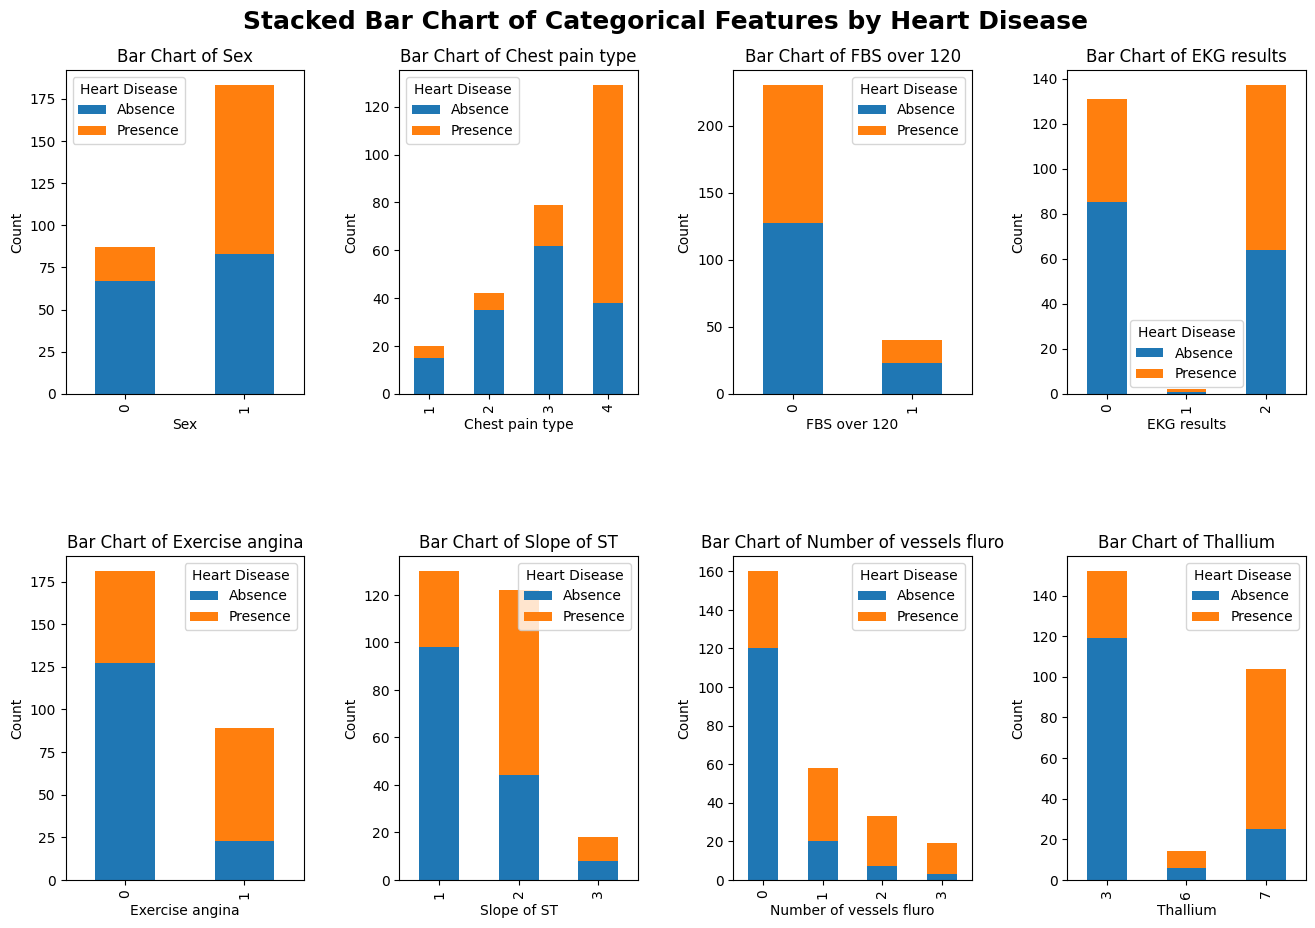

In [12]:
fig = plt.figure(figsize=(16, 10))
fig.suptitle('Stacked Bar Chart of Categorical Features by Heart Disease', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

for i, column in enumerate(categorical_df.columns):
    ax = fig.add_subplot(2, 4, i + 1)
    crosstab = pd.crosstab(df[column], df['Heart Disease'])
    crosstab.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Bar Chart of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.show()

Based on the bivariate analysis of heart disease, some interesting patterns were found that indicated correlations between various variables and the presence of heart disease. The following are the main findings identified:

1. Gender: Patients suffering from heart disease were found to be more in the male gender. This suggests that men are more prone to heart disease than women in the analyzed sample.

2. Chest Pain Type: Patients with heart disease (presence) were most likely to experience chest pain type number 4. This may indicate that this type of chest pain (most likely angina or more serious chest pain symptoms) is more commonly associated with heart disease.

3. Fasting Blood Sugar Level (FBS): There was no significant difference between patients with FBS (fasting blood sugar) above 120 mg/dL and patients with FBS below 120 mg/dL in terms of heart disease presence. This suggests that high fasting blood sugar levels were not a major differentiator in this sample for heart disease.

4. Electrocardiogram (ECG) results: Patients with heart disease tend to have ECG results at level 2. This may indicate the presence of specific abnormalities often found in patients with heart disease.

5. Exercise Angina: Patients with heart disease are more likely to experience exercise angina, which is chest pain triggered by physical activity. This suggests that this symptom is an important indicator of heart disease.

6. Slope of ST Segment: Patients suffering from heart disease often have a slope of ST segment at a value of 2. This slope usually indicates changes in the ST segment that could be related to ischemia or other heart damage.

7. Number of Vessels Fluro: Patients with heart disease show blockage or narrowing in one, two, or three coronary blood vessels (levels 1, 2, and 3). This indicates that the severity of heart disease may vary depending on the number of blood vessels affected.

8. Thalium Scan: Patients with heart disease tend to have a thalium value of 7, which may indicate abnormal results on a heart perfusion test. This value could indicate serious problems in blood flow to the heart muscle.

Overall, these findings provide valuable insights into the characteristics of patients with heart disease and may help in the identification of risk factors and the development of more effective prevention and treatment strategies.

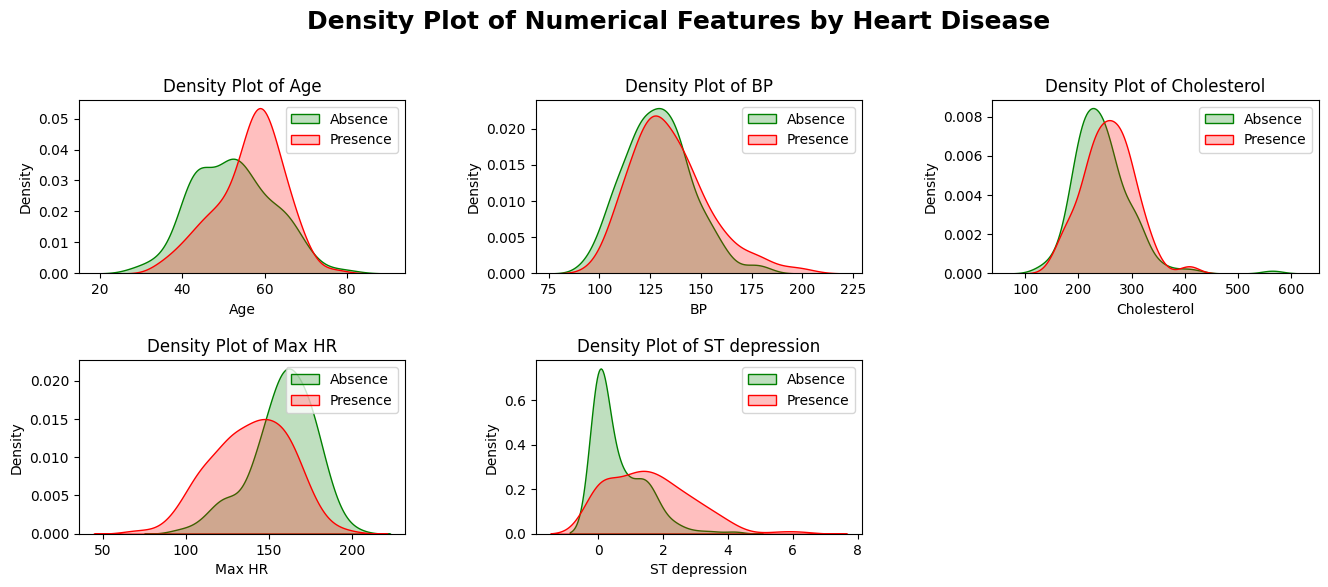

In [13]:
fig = plt.figure(figsize=(16, 15))
fig.suptitle('Density Plot of Numerical Features by Heart Disease', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

for i, column in enumerate(numerical_df.columns):
    ax = fig.add_subplot(5, 3, i + 1)
    sns.kdeplot(data=df[df['Heart Disease'] == 'Absence'][column], color="Green", shade=True, label="Absence")
    sns.kdeplot(data=df[df['Heart Disease'] == 'Presence'][column], color="Red", shade=True, label="Presence")
    ax.set_title(f'Density Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')
    ax.legend()

plt.show()

Based on the bivariate analysis that correlated numerical data with heart disease, several significant patterns were found that provided a more in-depth look at patient characteristics.Here are the key findings:

1. Age:The majority of patients suffering from heart disease are at an advanced age, particularly in their 60s. This suggests that the risk of heart disease increases with age, especially in this age group.

2. Blood Pressure (BP): There was no significant difference in blood pressure values between patients with heart disease (presence) and those without (absence). This indicates that blood pressure is not a major discriminator in the presence of heart disease in the analyzed sample.

3. Cholesterol Levels: Similar to blood pressure, total cholesterol levels showed no significant difference between patients with and without heart disease. This may indicate that factors other than total cholesterol play a greater role in heart disease risk in this population.

4. Maximal Heart Rate (Max HR): Patients suffering from heart disease tend to have a maximal heart rate in the range of 150 to 200 beats per minute. This suggests that patients with heart disease may experience a higher heart rate response during physical activity or stress tests.

5. ST Segment Depression (ST Depression): Patients with heart disease generally have ST segment depression values in the range of 1 to 2 mm, with 2 mm being the highest. This significant ST-segment depression often indicates the presence of myocardial ischemia, which is an indication of inadequate blood flow to the heart muscle.

Overall, these findings provide important insights into the demographic and clinical profile of patients with heart disease. This information can be used to improve prevention and treatment strategies, and aid in the early identification and management of patients at high risk of developing heart disease.

## Data Preparation (Preprocessing)

### Encoding Label

In [14]:
from sklearn.preprocessing import LabelEncoder
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [15]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,3,130,322,0,2,109,0,2.4,1,3,0,1
1,80,0,2,115,564,0,2,160,0,1.6,1,0,2,0
2,55,1,1,124,261,0,0,141,0,0.3,0,0,2,1
3,65,1,3,128,263,0,0,105,1,0.2,1,1,2,0
4,45,0,1,120,269,0,2,121,1,0.2,0,1,0,0


### Reduce Outliers

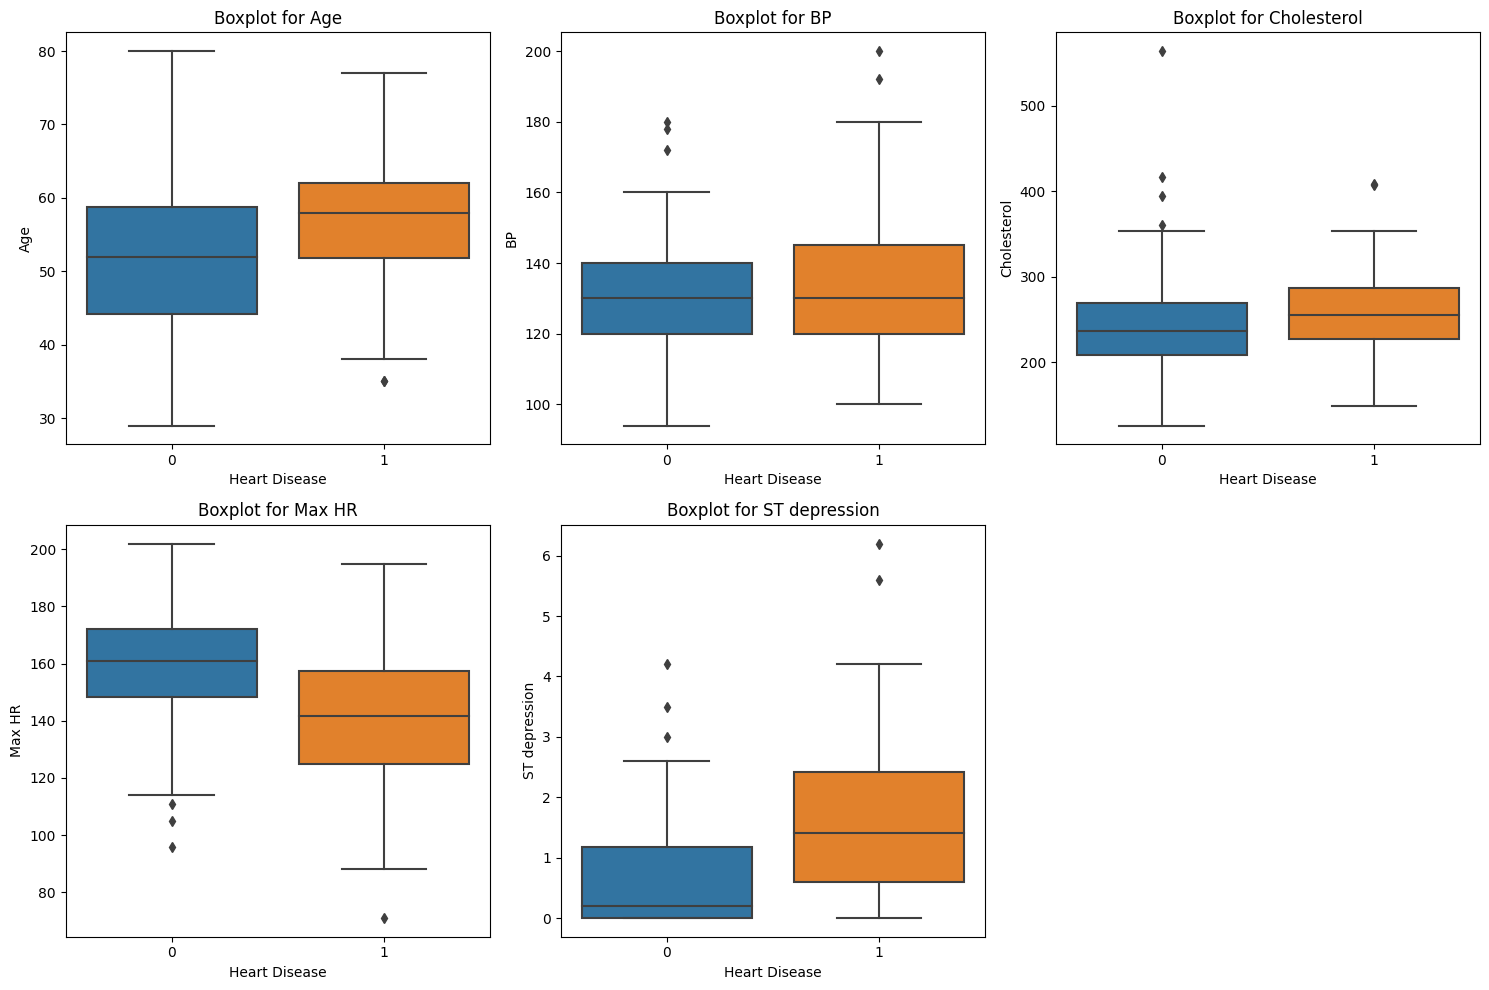

In [16]:
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_df.columns):
    sns.boxplot(x='Heart Disease', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

for i in range(len(numerical_df.columns), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [17]:
def remove_outliers_iqr(data, numeric_columns, threshold=1.5):
    Q1 = data[numeric_columns].quantile(0.10)
    Q3 = data[numeric_columns].quantile(0.90)
    IQR = Q3 - Q1

    outlier_rows = ((data[numeric_columns] < (Q1 - threshold * IQR)) | (data[numeric_columns] > (Q3 + threshold * IQR))).any(axis=1)
    cleaned_data = data[~outlier_rows]

    return cleaned_data

In [18]:
cleaned_dataset = remove_outliers_iqr(df, numerical_df.columns)
df = pd.DataFrame(cleaned_dataset)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      269 non-null    int64  
 1   Sex                      269 non-null    int64  
 2   Chest pain type          269 non-null    int64  
 3   BP                       269 non-null    int64  
 4   Cholesterol              269 non-null    int64  
 5   FBS over 120             269 non-null    int64  
 6   EKG results              269 non-null    int64  
 7   Max HR                   269 non-null    int64  
 8   Exercise angina          269 non-null    int64  
 9   ST depression            269 non-null    float64
 10  Slope of ST              269 non-null    int64  
 11  Number of vessels fluro  269 non-null    int64  
 12  Thallium                 269 non-null    int64  
 13  Heart Disease            269 non-null    int64  
dtypes: float64(1), int64(13)
memory

### Scalling Data

In [19]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df1 = df[numerical_df.columns]
df2 = df.drop(numerical_df.columns,axis=1)
df2 = pd.DataFrame(df2)
df2.reset_index(drop=True, inplace=True)

In [20]:
robust_df = scaler.fit_transform(df1)
robust_df = pd.DataFrame(robust_df, columns=numerical_df.columns)
robust_df.reset_index(drop=True, inplace=True)

In [21]:
df_merges = pd.concat([robust_df, df2], axis=1)
df_merges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      269 non-null    float64
 1   BP                       269 non-null    float64
 2   Cholesterol              269 non-null    float64
 3   Max HR                   269 non-null    float64
 4   ST depression            269 non-null    float64
 5   Sex                      269 non-null    int64  
 6   Chest pain type          269 non-null    int64  
 7   FBS over 120             269 non-null    int64  
 8   EKG results              269 non-null    int64  
 9   Exercise angina          269 non-null    int64  
 10  Slope of ST              269 non-null    int64  
 11  Number of vessels fluro  269 non-null    int64  
 12  Thallium                 269 non-null    int64  
 13  Heart Disease            269 non-null    int64  
dtypes: float64(5), int64(9)
me

## Relationship Analysis

<Axes: >

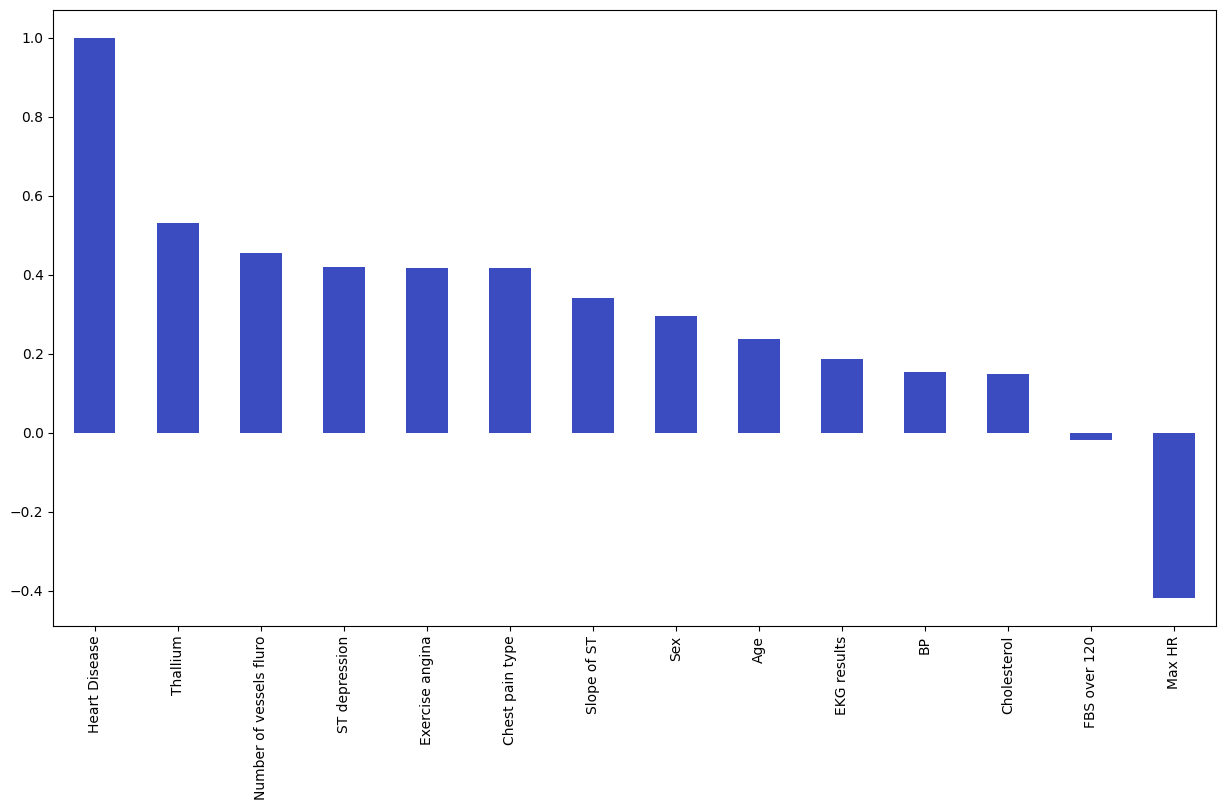

In [22]:
plt.figure(figsize=(15,8))
df_merges.corr()['Heart Disease'].sort_values(ascending = False).plot(kind='bar', cmap='coolwarm')

The relationship between various factors and heart disease shows that some variables have strong correlations. In-depth analysis of this data reveals significant patterns that can help in the identification and management of heart disease risk. The following are factors that have a strong association with heart disease and the nature of the association:

1. Thalium Scan:

Positive Relationship: Higher thalium values indicate an increased risk of heart disease. Thalium scans are used to assess cardiac perfusion, and abnormal results may indicate inadequate blood flow to the heart muscle, which is a strong indicator of heart disease.

2. Number of Vessels Fluro:

Positive Relationship: The higher the number of blood vessels that show blockage or narrowing on fluoroscopy, the more likely the patient has heart disease. This suggests that the presence of multiple affected blood vessels is a sign of significant risk.

3. ST Depression:

Positive Relationship: Higher ST segment depression values on ECG indicate an increased risk of heart disease. ST depression often indicates myocardial ischemia, which occurs when there is insufficient blood flow to the heart.

4. Exercise Angina:

A Positive Relationship: Patients who experience exercise angina have a higher risk of heart disease. Exercise angina, which is chest pain that occurs during physical activity, indicates a serious problem in the blood supply to the heart during physical stress.

5. Chest Pain Type:

Positive Relationship: Certain types of chest pain, especially type 4, are strongly associated with the presence of heart disease. More severe or specific chest pain is often a primary symptom of heart problems.

6. Maximal Heart Rate (Max HR):

Negative Relationship: There is a negative relationship between Max HR and heart disease. Patients with heart disease tend to have lower Max HR values during physical activity or stress tests. This may be due to the heart's decreased ability to achieve a high maximal heart rate due to poor cardiovascular condition.



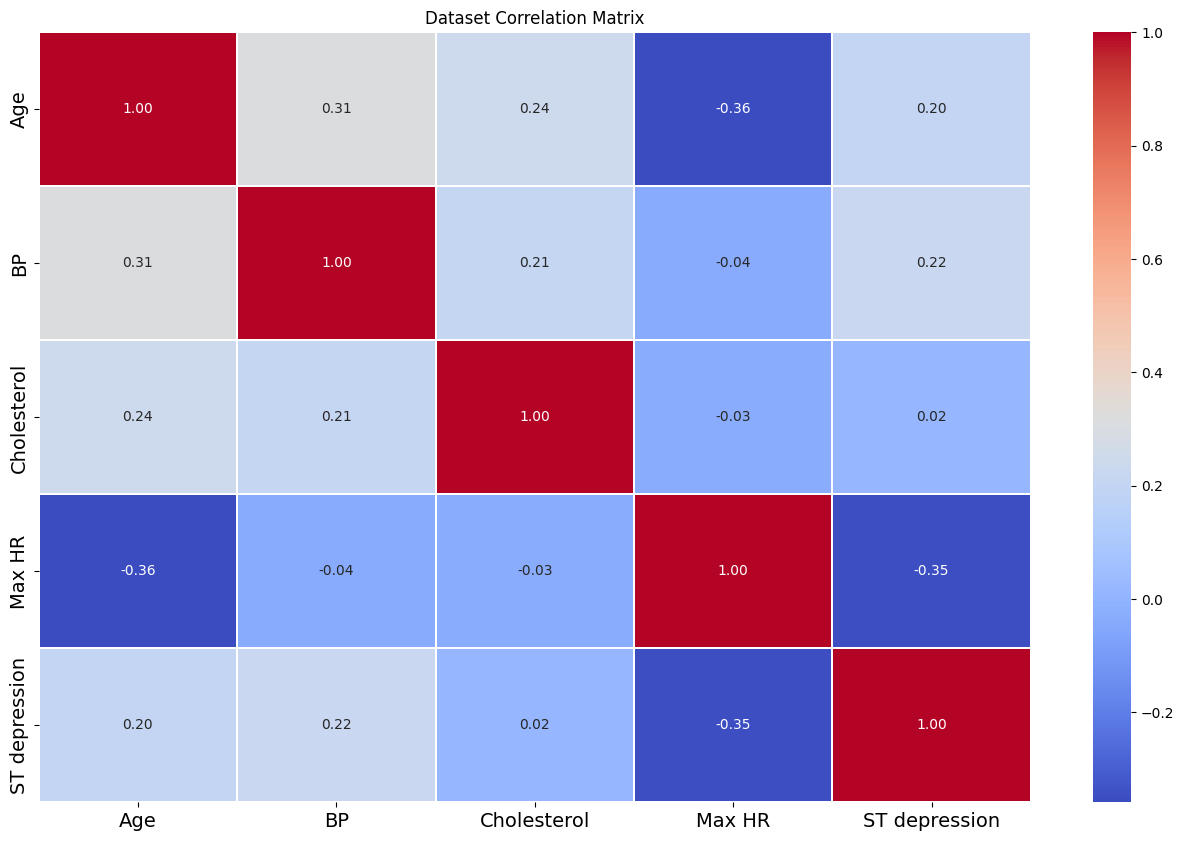

In [23]:
fig, ax = plt.subplots(figsize=[16,10])
sns.heatmap(df_merges[numerical_df.columns].corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='coolwarm')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix')
fig.show()

Based on the correlation analysis, no strong relationship was found between all the numerical features. The low correlation value indicates that the possibility of multicollinearity is very small. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, which can interfere with the estimation of model parameters and reduce their interpretability. In the absence of significant multicollinearity, better model accuracy is obtained.

## Machine Learning Analysis

### Split Dataset

In [24]:
from sklearn.model_selection import train_test_split

X= df_merges.drop('Heart Disease',axis=1)
y= df_merges['Heart Disease']

In [25]:
num_rows_X, num_columns_X = X.shape
print(f'X: Number of rows = {num_rows_X}, Number of columns = {num_columns_X}')

num_rows_y = y.shape[0]
print(f'y: Number of rows = {num_rows_y}')

X: Number of rows = 269, Number of columns = 13
y: Number of rows = 269


In [26]:
X_train, X_test,y_train, y_test = train_test_split(X,y,
                                   random_state=42,
                                   test_size=0.25,
                                   shuffle=True)

In [27]:
num_rows_X_train, num_columns_X_train = X_train.shape
print(f'X_train: Number of rows = {num_rows_X_train}, Number of columns = {num_columns_X_train}')

num_rows_X_test, num_columns_X_test = X_test.shape
print(f'X_test: Number of rows = {num_rows_X_test}, Number of columns = {num_columns_X_test}')

num_rows_y_train = y_train.shape[0]
print(f'y_train: Number of rows = {num_rows_y_train}')

num_rows_y_test = y_test.shape[0]
print(f'y_test: Number of rows = {num_rows_y_test}')

X_train: Number of rows = 201, Number of columns = 13
X_test: Number of rows = 68, Number of columns = 13
y_train: Number of rows = 201
y_test: Number of rows = 68


### SVM Classifier

In [28]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, cohen_kappa_score, matthews_corrcoef
from sklearn.svm import SVC

In [29]:
def grid_search_cv(X, y, model, param_grid, cv=10):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    grid_search = GridSearchCV(model, param_grid, scoring={
        'Accuracy': make_scorer(accuracy_score),
        'AUC': make_scorer(roc_auc_score),
        'Recall': make_scorer(recall_score),
        'Prec.': make_scorer(precision_score),
        'F1': make_scorer(f1_score),
        'Kappa': make_scorer(cohen_kappa_score),
        'MCC': make_scorer(matthews_corrcoef)
    }, cv=kf, refit='Accuracy')

    grid_search.fit(X, y)
    params = grid_search.cv_results_['params']
    results_grid_svm = pd.DataFrame(grid_search.cv_results_)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    metrics = ['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Kappa', 'MCC']
    mean_scores = {metric: [] for metric in metrics}
    fold = []
    fold_number = 1
    print("Perbandingan Performa Prediksi Setiap Fold pada Nilai Parameter Terbaik")

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        best_model.fit(X_train, y_train)
        y_pred_test = best_model.predict(X_test)

        fold_metrics = {
            'Accuracy': accuracy_score(y_test, y_pred_test),
            'AUC': roc_auc_score(y_test, y_pred_test),
            'Recall': recall_score(y_test, y_pred_test),
            'Prec.': precision_score(y_test, y_pred_test),
            'F1': f1_score(y_test, y_pred_test),
            'Kappa': cohen_kappa_score(y_test, y_pred_test),
            'MCC': matthews_corrcoef(y_test, y_pred_test)
        }

        print(f'Fold {fold_number}:')
        for metric in metrics:
            print(f'{metric}:', fold_metrics[metric])
            mean_scores[metric].append(fold_metrics[metric])

        print('---')

        fold.append(fold_number)
        fold_number += 1

    mean_scores = {metric: np.mean(scores) for metric, scores in mean_scores.items()}

    results = pd.DataFrame({
        'Fold': fold,
        **mean_scores
    })

    results_mean = pd.DataFrame({
        metric: [mean_scores[metric]] for metric in metrics
    })

    return best_params, results, results_mean, results_grid_svm

In [30]:
model = SVC()
param_grid = {
    'C': [0.001, 0.05, 0.01, 0.05, 0.1, 0.5, 1, 10, 100],
    'gamma': [0.001, 0.05, 0.01, 0.05, 0.1, 0.5, 1, 1.5, 2],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

params, df1, df1_mean, results_svm = grid_search_cv(X, y, model, param_grid, cv=10)

Perbandingan Performa Prediksi Setiap Fold pada Nilai Parameter Terbaik
Fold 1:
Accuracy: 0.8148148148148148
AUC: 0.8159340659340659
Recall: 0.8461538461538461
Prec.: 0.7857142857142857
F1: 0.8148148148148148
Kappa: 0.6301369863013699
MCC: 0.6318681318681318
---
Fold 2:
Accuracy: 0.8148148148148148
AUC: 0.825
Recall: 0.7333333333333333
Prec.: 0.9166666666666666
F1: 0.8148148148148148
Kappa: 0.6341463414634146
MCC: 0.65
---
Fold 3:
Accuracy: 0.8518518518518519
AUC: 0.8583333333333333
Recall: 0.9166666666666666
Prec.: 0.7857142857142857
F1: 0.8461538461538461
Kappa: 0.7049180327868853
MCC: 0.7127180599416806
---
Fold 4:
Accuracy: 0.8518518518518519
AUC: 0.8500000000000001
Recall: 0.8333333333333334
Prec.: 0.8333333333333334
F1: 0.8333333333333334
Kappa: 0.7
MCC: 0.7
---
Fold 5:
Accuracy: 0.9259259259259259
AUC: 0.9166666666666667
Recall: 0.8333333333333334
Prec.: 1.0
F1: 0.9090909090909091
Kappa: 0.847457627118644
MCC: 0.8574929257125441
---
Fold 6:
Accuracy: 0.7777777777777778
AUC: 0.74

In [31]:
df1

,Fold,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1,0.85114,0.843311,0.789161,0.879107,0.820716,0.692593,0.707658
1,2,0.85114,0.843311,0.789161,0.879107,0.820716,0.692593,0.707658
2,3,0.85114,0.843311,0.789161,0.879107,0.820716,0.692593,0.707658
3,4,0.85114,0.843311,0.789161,0.879107,0.820716,0.692593,0.707658
4,5,0.85114,0.843311,0.789161,0.879107,0.820716,0.692593,0.707658
5,6,0.85114,0.843311,0.789161,0.879107,0.820716,0.692593,0.707658
6,7,0.85114,0.843311,0.789161,0.879107,0.820716,0.692593,0.707658
7,8,0.85114,0.843311,0.789161,0.879107,0.820716,0.692593,0.707658
8,9,0.85114,0.843311,0.789161,0.879107,0.820716,0.692593,0.707658
9,10,0.85114,0.843311,0.789161,0.879107,0.820716,0.692593,0.707658


In [32]:
print("Best parameters:",params)
print("Average Accuracy:", df1_mean['Accuracy'])
print("Average AUC:",  df1_mean['AUC'])
print("Average Recall:", df1_mean['Recall'])
print("Average Prec.:", df1_mean['Prec.'])
print("Average F1:",  df1_mean['F1'])
print("Average Kappa:", df1_mean['Kappa'])
print("Average MCC:", df1_mean['MCC'])

Best parameters: {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
Average Accuracy: 0    0.85114
Name: Accuracy, dtype: float64
Average AUC: 0    0.843311
Name: AUC, dtype: float64
Average Recall: 0    0.789161
Name: Recall, dtype: float64
Average Prec.: 0    0.879107
Name: Prec., dtype: float64
Average F1: 0    0.820716
Name: F1, dtype: float64
Average Kappa: 0    0.692593
Name: Kappa, dtype: float64
Average MCC: 0    0.707658
Name: MCC, dtype: float64


### DT Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, cohen_kappa_score, matthews_corrcoef

In [36]:
def grid_search_cv(X, y, model, param_grid, cv=10):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    grid_search = GridSearchCV(model, param_grid, scoring={
        'Accuracy': make_scorer(accuracy_score),
        'AUC': make_scorer(roc_auc_score),
        'Recall': make_scorer(recall_score),
        'Prec.': make_scorer(precision_score),
        'F1': make_scorer(f1_score),
        'Kappa': make_scorer(cohen_kappa_score),
        'MCC': make_scorer(matthews_corrcoef)
    }, cv=kf, refit='Accuracy')

    grid_search.fit(X, y)
    params = grid_search.cv_results_['params']
    results_grid_dt = pd.DataFrame(grid_search.cv_results_)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    metrics = ['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Kappa', 'MCC']
    mean_scores = {metric: [] for metric in metrics}
    fold = []
    fold_number = 1
    print("Perbandingan Performa Prediksi Setiap Fold pada Nilai Parameter Terbaik")

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        best_model.fit(X_train, y_train)
        y_pred_test = best_model.predict(X_test)

        fold_metrics = {
            'Accuracy': accuracy_score(y_test, y_pred_test),
            'AUC': roc_auc_score(y_test, y_pred_test),
            'Recall': recall_score(y_test, y_pred_test),
            'Prec.': precision_score(y_test, y_pred_test),
            'F1': f1_score(y_test, y_pred_test),
            'Kappa': cohen_kappa_score(y_test, y_pred_test),
            'MCC': matthews_corrcoef(y_test, y_pred_test)
        }

        print(f'Fold {fold_number}:')
        for metric in metrics:
            print(f'{metric}:', fold_metrics[metric])
            mean_scores[metric].append(fold_metrics[metric])

        print('---')

        fold.append(fold_number)
        fold_number += 1

    mean_scores = {metric: np.mean(scores) for metric, scores in mean_scores.items()}

    results = pd.DataFrame({
        'Fold': fold,
        **mean_scores
    })

    results_mean = pd.DataFrame({
        metric: [mean_scores[metric]] for metric in metrics
    })

    return best_params, results, results_mean, results_grid_dt

In [37]:
model = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini'],
    'max_depth': np.arange(10,17,1),
    'min_samples_split': np.arange(1,5,1),
    'min_samples_leaf': np.arange(8,15,1),
    'max_features': ['log2']
}

params, df2, df2_mean, results_dt = grid_search_cv(X, y, model, param_grid, cv=10)

Perbandingan Performa Prediksi Setiap Fold pada Nilai Parameter Terbaik
Fold 1:
Accuracy: 0.7037037037037037
AUC: 0.7087912087912088
Recall: 0.8461538461538461
Prec.: 0.6470588235294118
F1: 0.7333333333333334
Kappa: 0.4130434782608696
MCC: 0.4320693281534378
---
Fold 2:
Accuracy: 0.7037037037037037
AUC: 0.725
Recall: 0.5333333333333333
Prec.: 0.8888888888888888
F1: 0.6666666666666667
Kappa: 0.4285714285714286
MCC: 0.4743416490252569
---
Fold 3:
Accuracy: 0.6666666666666666
AUC: 0.6500000000000001
Recall: 0.5
Prec.: 0.6666666666666666
F1: 0.5714285714285715
Kappa: 0.3076923076923077
MCC: 0.31622776601683794
---
Fold 4:
Accuracy: 0.6666666666666666
AUC: 0.675
Recall: 0.75
Prec.: 0.6
F1: 0.6666666666666665
Kappa: 0.3414634146341464
MCC: 0.35
---
Fold 5:
Accuracy: 0.9259259259259259
AUC: 0.9166666666666667
Recall: 0.8333333333333334
Prec.: 1.0
F1: 0.9090909090909091
Kappa: 0.847457627118644
MCC: 0.8574929257125441
---
Fold 6:
Accuracy: 0.7407407407407407
AUC: 0.7102272727272727
Recall: 0.5

In [38]:
df2

,Fold,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1,0.732621,0.725405,0.664417,0.732029,0.685796,0.452544,0.465515
1,2,0.732621,0.725405,0.664417,0.732029,0.685796,0.452544,0.465515
2,3,0.732621,0.725405,0.664417,0.732029,0.685796,0.452544,0.465515
3,4,0.732621,0.725405,0.664417,0.732029,0.685796,0.452544,0.465515
4,5,0.732621,0.725405,0.664417,0.732029,0.685796,0.452544,0.465515
5,6,0.732621,0.725405,0.664417,0.732029,0.685796,0.452544,0.465515
6,7,0.732621,0.725405,0.664417,0.732029,0.685796,0.452544,0.465515
7,8,0.732621,0.725405,0.664417,0.732029,0.685796,0.452544,0.465515
8,9,0.732621,0.725405,0.664417,0.732029,0.685796,0.452544,0.465515
9,10,0.732621,0.725405,0.664417,0.732029,0.685796,0.452544,0.465515


In [39]:
print("Best parameters:",params)
print("Average Accuracy:", df2_mean['Accuracy'])
print("Average AUC:",  df2_mean['AUC'])
print("Average Recall:", df2_mean['Recall'])
print("Average Prec.:", df2_mean['Prec.'])
print("Average F1:",  df2_mean['F1'])
print("Average Kappa:", df2_mean['Kappa'])
print("Average MCC:", df2_mean['MCC'])

Best parameters: {'criterion': 'gini', 'max_depth': 14, 'max_features': 'log2', 'min_samples_leaf': 14, 'min_samples_split': 2}
Average Accuracy: 0    0.732621
Name: Accuracy, dtype: float64
Average AUC: 0    0.725405
Name: AUC, dtype: float64
Average Recall: 0    0.664417
Name: Recall, dtype: float64
Average Prec.: 0    0.732029
Name: Prec., dtype: float64
Average F1: 0    0.685796
Name: F1, dtype: float64
Average Kappa: 0    0.452544
Name: Kappa, dtype: float64
Average MCC: 0    0.465515
Name: MCC, dtype: float64


### RF Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, cohen_kappa_score, matthews_corrcoef

In [41]:
def grid_search_cv(X, y, model, param_grid, cv=10):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    grid_search = GridSearchCV(model, param_grid, scoring={
        'Accuracy': make_scorer(accuracy_score),
        'AUC': make_scorer(roc_auc_score),
        'Recall': make_scorer(recall_score),
        'Prec.': make_scorer(precision_score),
        'F1': make_scorer(f1_score),
        'Kappa': make_scorer(cohen_kappa_score),
        'MCC': make_scorer(matthews_corrcoef)
    }, cv=kf, refit='Accuracy')

    grid_search.fit(X, y)
    params = grid_search.cv_results_['params']
    results_grid_rf = pd.DataFrame(grid_search.cv_results_)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    metrics = ['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Kappa', 'MCC']
    mean_scores = {metric: [] for metric in metrics}
    fold = []
    fold_number = 1
    print("Perbandingan Performa Prediksi Setiap Fold pada Nilai Parameter Terbaik")

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        best_model.fit(X_train, y_train)
        y_pred_test = best_model.predict(X_test)

        fold_metrics = {
            'Accuracy': accuracy_score(y_test, y_pred_test),
            'AUC': roc_auc_score(y_test, y_pred_test),
            'Recall': recall_score(y_test, y_pred_test),
            'Prec.': precision_score(y_test, y_pred_test),
            'F1': f1_score(y_test, y_pred_test),
            'Kappa': cohen_kappa_score(y_test, y_pred_test),
            'MCC': matthews_corrcoef(y_test, y_pred_test)
        }

        print(f'Fold {fold_number}:')
        for metric in metrics:
            print(f'{metric}:', fold_metrics[metric])
            mean_scores[metric].append(fold_metrics[metric])

        print('---')

        fold.append(fold_number)
        fold_number += 1

    mean_scores = {metric: np.mean(scores) for metric, scores in mean_scores.items()}

    results = pd.DataFrame({
        'Fold': fold,
        **mean_scores
    })

    results_mean = pd.DataFrame({
        metric: [mean_scores[metric]] for metric in metrics
    })

    return best_params, results, results_mean, results_grid_rf

In [42]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [125, 150, 175, 200, 225],
    'criterion': ['gini'],
    'max_depth': [2,4,6,8,10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

# Perform grid search cross-validation and get the results
params, df3, df3_mean, results_rf = grid_search_cv(X, y, model, param_grid, cv=10)

Perbandingan Performa Prediksi Setiap Fold pada Nilai Parameter Terbaik
Fold 1:
Accuracy: 0.7777777777777778
AUC: 0.7747252747252749
Recall: 0.6923076923076923
Prec.: 0.8181818181818182
F1: 0.7500000000000001
Kappa: 0.5524861878453038
MCC: 0.5587376953345927
---
Fold 2:
Accuracy: 0.8518518518518519
AUC: 0.8666666666666667
Recall: 0.7333333333333333
Prec.: 1.0
F1: 0.846153846153846
Kappa: 0.7096774193548387
MCC: 0.7416198487095663
---
Fold 3:
Accuracy: 0.7407407407407407
AUC: 0.7500000000000002
Recall: 0.8333333333333334
Prec.: 0.6666666666666666
F1: 0.7407407407407408
Kappa: 0.4878048780487805
MCC: 0.5
---
Fold 4:
Accuracy: 0.8518518518518519
AUC: 0.8500000000000001
Recall: 0.8333333333333334
Prec.: 0.8333333333333334
F1: 0.8333333333333334
Kappa: 0.7
MCC: 0.7
---
Fold 5:
Accuracy: 0.9629629629629629
AUC: 0.9583333333333333
Recall: 0.9166666666666666
Prec.: 1.0
F1: 0.9565217391304348
Kappa: 0.9243697478991597
MCC: 0.9270248108869579
---
Fold 6:
Accuracy: 0.7777777777777778
AUC: 0.74147

In [43]:
df3

,Fold,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1,0.862536,0.855108,0.790443,0.899278,0.834452,0.716716,0.728866
1,2,0.862536,0.855108,0.790443,0.899278,0.834452,0.716716,0.728866
2,3,0.862536,0.855108,0.790443,0.899278,0.834452,0.716716,0.728866
3,4,0.862536,0.855108,0.790443,0.899278,0.834452,0.716716,0.728866
4,5,0.862536,0.855108,0.790443,0.899278,0.834452,0.716716,0.728866
5,6,0.862536,0.855108,0.790443,0.899278,0.834452,0.716716,0.728866
6,7,0.862536,0.855108,0.790443,0.899278,0.834452,0.716716,0.728866
7,8,0.862536,0.855108,0.790443,0.899278,0.834452,0.716716,0.728866
8,9,0.862536,0.855108,0.790443,0.899278,0.834452,0.716716,0.728866
9,10,0.862536,0.855108,0.790443,0.899278,0.834452,0.716716,0.728866


In [44]:
print("Best parameters:",params)
print("Average Accuracy:", df3_mean['Accuracy'])
print("Average AUC:",  df3_mean['AUC'])
print("Average Recall:", df3_mean['Recall'])
print("Average Prec.:", df3_mean['Prec.'])
print("Average F1:",  df3_mean['F1'])
print("Average Kappa:", df3_mean['Kappa'])
print("Average MCC:", df3_mean['MCC'])

Best parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 225}
Average Accuracy: 0    0.862536
Name: Accuracy, dtype: float64
Average AUC: 0    0.855108
Name: AUC, dtype: float64
Average Recall: 0    0.790443
Name: Recall, dtype: float64
Average Prec.: 0    0.899278
Name: Prec., dtype: float64
Average F1: 0    0.834452
Name: F1, dtype: float64
Average Kappa: 0    0.716716
Name: Kappa, dtype: float64
Average MCC: 0    0.728866
Name: MCC, dtype: float64


In [54]:
rf = RandomForestClassifier(criterion='gini', max_depth=4, max_features='sqrt', 
                            min_samples_leaf=4, min_samples_split=5, n_estimators=225, 
                            n_jobs=-1, oob_score=False,random_state=42, verbose=0, warm_start=False)

rf.fit(X_train, y_train)
prediction_test = rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7647058823529411


In [59]:
feature_importance = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                    Feature  Importance
6           Chest pain type    0.215402
12                 Thallium    0.170571
11  Number of vessels fluro    0.134232
3                    Max HR    0.116109
4             ST depression    0.091159
9           Exercise angina    0.067019
10              Slope of ST    0.046633
0                       Age    0.041822
5                       Sex    0.041597
2               Cholesterol    0.036967
1                        BP    0.027568
8               EKG results    0.009001
7              FBS over 120    0.001919


<Axes: >

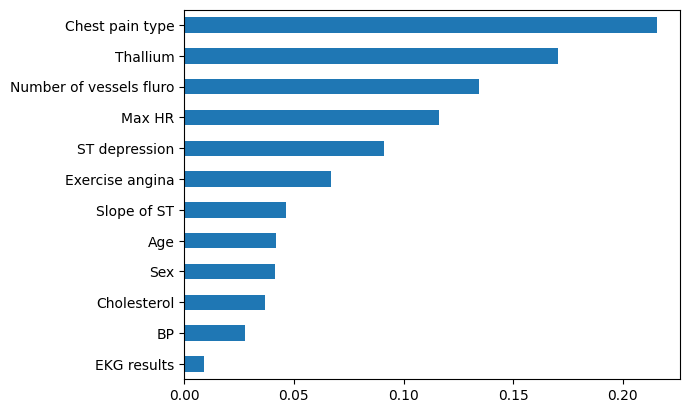

In [56]:
weights = pd.Series(feature_importance,
                 index=X.columns.values)
weights.sort_values()[-12:].plot(kind = 'barh')

Based on the relationship analysis and feature importance of the best model, the most influential factors in detecting heart disease risk were clearly identified. These factors are chest pain type, thallium test result, number of vessels showing blockage on fluoroscopy, maximal heart rate (Max HR), ST segment depression on ECG (ST Depression), and exercise angina.

The type of chest pain provides a direct indication of the severity and nature of the symptoms experienced by the patient, which is one of the important early indicators in the diagnosis of heart disease. Thalium test results are used to assess blood flow to the heart muscle and overall heart health, with abnormal results indicating perfusion problems. The number of blocked blood vessels, visible through fluoroscopy, signifies the severity of coronary artery disease.

The maximal heart rate achieved during a physical stress test gives an idea of the heart's response to physical activity, which can help identify patients at high risk. ST segment depression on an electrocardiogram indicates the presence of ischemia or inadequate blood flow to the heart muscle, which is an important sign of heart disease. Angina occurring during exercise is a typical symptom indicating a problem with the blood supply to the heart during physical activity.

Taken together, these factors contribute significantly to the prediction model, enabling more accurate and effective identification of high-risk patients. This knowledge can be used to direct more targeted medical interventions and improve prevention and treatment strategies for heart disease.

# Conclusion

1. The main characteristics of patients with heart disease include: advanced age (around 60s), maximal heart rate (Max HR) in the range of 150 to 200, ST segment depression (ST depression) in the range of 1-2 with 2 being the highest, chest pain type (chest pain) number 4, experiencing angina during exercise (exercise angina), slope of ST segment (slope of ST) at a value of 2, number of vessels detected on fluoroscopy (number of vessels fluro) at a level of 1, 2, or 3, and a thalium value of 7.

2. Factors influencing the risk of heart disease include: thalium scan results, number of vessels detected on fluoroscopy, ST segment depression, exercise angina, chest pain type, and max heart rate.

3. The results of the patient's heart health classification showed that the Random Forest (RF) model achieved the highest accuracy of 86% compared to the SVM and Decision Tree (DT) models.

4. Taking into account the identified factors, patients with these characteristics should undergo further examination in order to receive treatment as soon as possible, thereby reducing the number of patients with heart disease.